# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import pprint

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = requests.get(eth_url).json()['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57328.80
The current value of your 5.3 ETH is $18849.13


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# print(alpaca_api_key, alpaca_secret_key)
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
start = pd.Timestamp("2019-07-14", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-06-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Preview DataFrame
df_portfolio_year.tail(10)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-06-03 00:00:00-04:00  114.31  114.4600  114.2100  114.210  3270096   
2021-06-04 00:00:00-04:00  114.39  114.6700  114.2200  114.665  4334878   
2021-06-07 00:00:00-04:00  113.97  114.6400  113.9700  114.595  3639918   
2021-06-08 00:00:00-04:00  114.84  114.8700  114.7800  114.820  3951702   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050  3418086   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665931   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3470062   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970  2999623   
2021-06-15 00:00:00-04:00  114.90  115.0200  114.8700  114.995  5842592   
2021-06-16 00:00:00-04:00  115.07  115.1285  114.5100  114.630  7527672   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2021-06-03 00:00:00-04:00  417.87  419.99  416.2800  418.86  51582905  
2021-06-04 00:00:00-04:00  420.75  422.92  418.8422  422.57  45129316  
2021-06-07 00:00:00-04:00  422.59  422.78  421.1900  422.23  41442963  
2021-06-08 00:00:00-04:00  423.11  423.21  420.3200  422.27  40131441  
2021-06-09 00:00:00-04:00  423.18  423.26  421.4100  421.62  38368598  
2021-06-10 00:00:00-04:00  422.96  424.63  421.5500  423.58  43574416  
2021-06-11 00:00:00-04:00  424.19  424.42  422.8200  424.32  37014839  
2021-06-14 00:00:00-04:00  424.43  425.29  423.1000  425.29  33128340  
2021-06-15 00:00:00-04:00  425.43  425.46  423.5400  424.50  42885806  
2021-06-16 00:00:00-04:00  424.63  424.87  419.9200  422.12  73638324

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio_year['AGG']['close'].iloc[-1]
spy_close_price = df_portfolio_year['SPY']['close'].iloc[-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.63
Current SPY closing price: $422.12


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * agg_close_price
my_agg_value = my_agg * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5731.50
The current value of your 200 AGG shares is $84424.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_amount = my_btc_value + my_eth_value
shares_amount = my_spy_value + my_agg_value
# Create savings DataFrame
df_savings = pd.DataFrame({"amount" : [crypto_amount, shares_amount]}, index = ["crypto", "shares"])
# df_savings

# Display savings DataFrame
display(df_savings)

,amount
crypto,76177.932
shares,90155.500


<AxesSubplot:title={'center':'My Portfolio'}, ylabel='amount'>

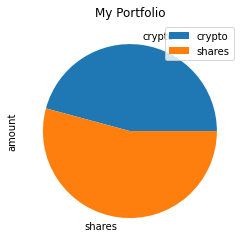

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="My Portfolio")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'][0] + df_savings['amount'][1]

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having sufficient funds for emergencies.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goals.")
elif total_savings < emergency_fund:
    print(f"You need {round(emergency_fund - total_savings, 2)} more to reach your emergeny funds goal.")

Congratulations on having sufficient funds for emergencies.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-16', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-09-25 00:00:00-04:00  109.85  110.04  109.82  110.025  3031529.0     NaN   
2017-09-26 00:00:00-04:00  109.95  110.02  109.88  109.990  2074080.0  249.42   
2017-09-27 00:00:00-04:00  109.67  109.75  109.60  109.668  1439682.0  249.88   
2017-09-28 00:00:00-04:00  109.58  109.72  109.51  109.680  1553324.0  249.73   
2017-09-29 00:00:00-04:00  109.74  109.77  109.54  109.640  2969204.0  250.34   

                                                                
                             high      low   close      volume  
time                                                            
2017-09-25 00:00:00-04:00     NaN      NaN     NaN         NaN  
2017-09-26 00:00:00-04:00  249.70  248.805  249.05  36761208.0  
2017-09-27 00:00:00-04:00  250.49  248.870  250.02  51473231.0  
2017-09-28 00:00:00-04:00  250.44  249.630  250.34  25577234.0  
2017-09-29 00:00:00-04:00  251.32  250.130  251.20  41410208.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-09-25 00:00:00-04:00  109.85  110.04  109.82  110.025  3031529.0   
2017-09-26 00:00:00-04:00  109.95  110.02  109.88  109.990  2074080.0   
2017-09-27 00:00:00-04:00  109.67  109.75  109.60  109.668  1439682.0   
2017-09-28 00:00:00-04:00  109.58  109.72  109.51  109.680  1553324.0   
2017-09-29 00:00:00-04:00  109.74  109.77  109.54  109.640  2969204.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-09-25 00:00:00-04:00          NaN     NaN     NaN      NaN     NaN   
2017-09-26 00:00:00-04:00    -0.000318  249.42  249.70  248.805  249.05   
2017-09-27 00:00:00-04:00    -0.002928  249.88  250.49  248.870  250.02   
2017-09-28 00:00:00-04:00     0.000109  249.73  250.44  249.630  250.34   
2017-09-29 00:00:00-04:00    -0.000365  250.34  251.32  250.130  251.20   

                                                    
                               volume daily_return  
time                                                
2017-09-25 00:00:00-04:00         NaN          NaN  
2017-09-26 00:00:00-04:00  36761208.0          NaN  
2017-09-27 00:00:00-04:00  51473231.0     0.003895  
2017-09-28 00:00:00-04:00  25577234.0     0.001280  
2017-09-29 00:00:00-04:00  41410208.0     0.003435

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Tony\Desktop\FinTech Bootcamp\Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002084,1.001697,0.997882,1.003840,1.015912,1.003819,1.000509,0.990311,0.992642,0.996865,...,1.003258,0.994351,1.003566,0.998802,0.997090,0.999374,0.997904,1.002076,1.006566,0.990760
2,1.004150,1.001199,1.000843,1.001559,1.025927,1.012104,1.010676,0.984861,0.996463,0.999304,...,0.994505,0.995020,0.995629,1.000875,1.003730,0.998637,0.991626,0.999114,1.005955,0.994066
3,1.001190,1.007666,0.995435,1.004417,1.019288,1.004439,1.005488,0.987003,1.011337,1.009568,...,0.997102,0.992673,0.997008,0.997320,1.000588,0.998914,0.992815,0.994833,1.009382,0.993233
4,1.002390,1.004184,1.002612,1.002306,1.022750,1.001927,1.008865,0.987474,1.007571,1.010112,...,0.989028,0.978620,0.992149,0.991850,0.996770,1.000887,0.998223,0.991551,1.005199,0.993193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.969201,19.857451,5.445302,14.151737,22.037036,8.589276,18.228449,8.699980,4.957699,10.121566,...,4.022928,5.491458,11.329570,12.343240,10.428276,8.670393,22.775298,16.295032,10.441188,14.303869
7557,7.988129,19.918990,5.450368,14.208684,22.139551,8.556045,18.371024,8.676843,4.979527,10.147714,...,4.040236,5.520456,11.377225,12.304551,10.379135,8.739323,22.784685,16.452377,10.406983,14.366123
7558,7.939607,19.934622,5.458664,14.124592,21.937831,8.481188,18.288938,8.684782,4.959230,10.054455,...,4.060473,5.538301,11.346671,12.300498,10.456758,8.751226,22.806024,16.461689,10.373692,14.255076
7559,7.908277,19.782224,5.420636,14.141971,21.891251,8.505830,18.181417,8.759319,4.963993,10.066653,...,4.056927,5.521096,11.389941,12.383954,10.438962,8.793479,22.621804,16.478663,10.379950,14.252909


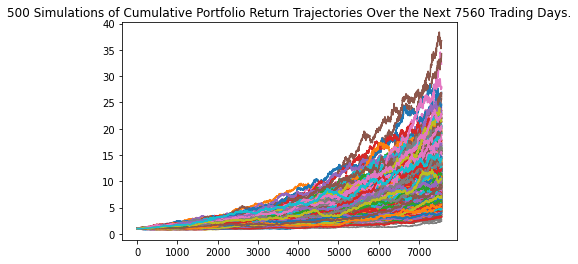

In [19]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

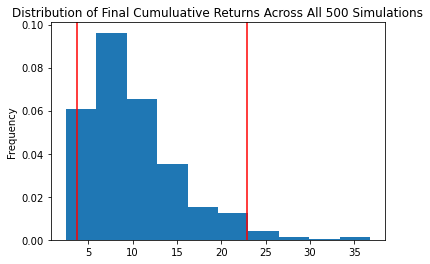

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             10.129511
std               5.193405
min               2.463524
25%               6.222953
50%               8.919947
75%              12.464037
max              36.771657
95% CI Lower      3.764596
95% CI Upper     22.927523
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $75291.92 and $458550.47


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $112937.88 and $687825.7


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Tony\Desktop\FinTech Bootcamp\Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998891,1.003499,1.006810,1.006625,0.992443,0.998429,0.989105,1.005150,1.000815,0.995736,...,1.000356,1.000638,0.996319,0.990760,1.005541,0.993549,1.001170,1.003882,1.000455,1.007882
2,1.003850,1.002659,1.009573,1.005297,0.997522,0.993162,0.979847,1.012354,1.003522,1.007147,...,1.002057,1.000108,0.997394,0.993752,1.008277,0.987471,0.992104,1.012901,0.995389,1.006357
3,1.002852,0.996990,1.008451,1.014570,1.001206,0.984889,0.977608,1.014101,1.013240,0.994692,...,1.003354,1.003707,0.998330,0.996021,1.004803,0.986573,0.986182,1.005163,0.994760,1.002849
4,1.006673,0.999999,1.011150,1.017974,1.000777,0.986557,0.971871,1.013168,1.008672,0.993645,...,0.996492,1.000894,0.994658,0.994365,1.006971,0.990917,0.988209,1.007913,0.989742,1.007744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.400491,1.150198,1.385167,1.602009,1.422428,1.172850,1.810660,1.391709,1.587363,1.132353,...,1.805504,2.000692,1.097037,2.547270,1.651936,1.261338,1.321670,1.058314,1.264530,1.575510
1257,1.394336,1.151293,1.382494,1.596744,1.426676,1.182371,1.803571,1.383918,1.585888,1.123750,...,1.801774,2.001298,1.092828,2.565779,1.656981,1.255798,1.327765,1.072447,1.276742,1.567315
1258,1.379696,1.158190,1.391423,1.584678,1.421752,1.186672,1.785914,1.384809,1.585383,1.124013,...,1.800863,1.989690,1.086833,2.586992,1.654907,1.248107,1.334544,1.076813,1.274310,1.584839
1259,1.381123,1.157262,1.394742,1.582694,1.426461,1.181417,1.776368,1.390183,1.591856,1.129828,...,1.797100,2.014528,1.088332,2.598867,1.648702,1.251277,1.338854,1.070129,1.285419,1.578368


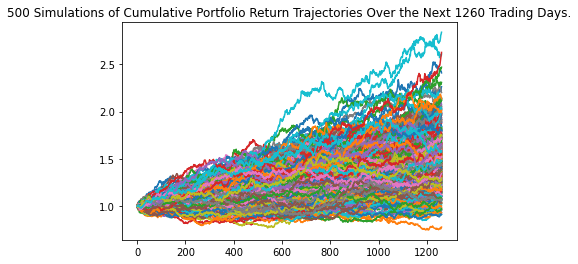

In [33]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

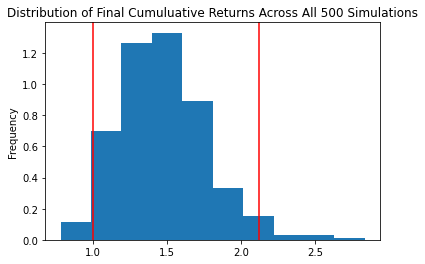

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.470697
std               0.292771
min               0.779708
25%               1.261988
50%               1.444618
75%               1.645979
max               2.838780
95% CI Lower      0.999245
95% CI Upper      2.122611
Name: 1260, dtype: float64


In [39]:
# Set initial investment
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 5 years will end within in the range of $29977.35 and $63678.34


### Ten Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [41]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Tony\Desktop\FinTech Bootcamp\Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993284,1.001792,1.005487,0.986703,1.000383,0.999116,1.001713,1.001831,0.995668,1.000511,...,0.996004,0.996821,0.991535,1.001870,0.995968,0.993427,1.000511,1.008716,0.999338,0.992772
2,0.997749,1.001836,1.010272,0.986906,0.999720,0.995832,1.000147,0.994150,1.001064,1.006432,...,1.000153,1.002312,0.994901,1.006965,0.993684,0.985106,0.997723,1.009676,1.001601,0.989201
3,0.994840,1.003395,1.014545,0.989901,0.996904,0.989135,1.003066,0.986154,1.002774,1.004378,...,1.008737,0.999811,0.993174,1.002874,0.992649,0.987445,1.007667,0.994656,1.001723,0.991089
4,0.993854,1.001876,1.014382,0.992115,0.996989,0.993378,1.003620,0.983548,1.005675,1.018153,...,1.012826,1.008709,0.995683,0.992361,0.991855,0.988662,1.013753,0.995602,1.005880,0.990430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.000029,2.261405,2.595647,3.287177,1.864223,4.633810,1.980461,1.449148,3.083673,4.025908,...,1.445144,2.265810,1.477118,1.226664,1.842578,2.736359,2.319052,1.257460,1.770921,1.352338
2517,1.003760,2.259824,2.621166,3.260855,1.867214,4.653100,2.008734,1.465369,3.078750,3.995274,...,1.459752,2.278560,1.480405,1.233058,1.834920,2.743381,2.325649,1.249629,1.762513,1.334115
2518,1.001002,2.271000,2.610837,3.249610,1.865840,4.667825,2.013319,1.461544,3.096979,3.985971,...,1.463348,2.292561,1.477232,1.235391,1.831044,2.748410,2.306094,1.248023,1.760733,1.349686
2519,1.008554,2.259106,2.623070,3.270898,1.863188,4.648767,2.007255,1.464757,3.117982,3.977897,...,1.467893,2.274640,1.468267,1.235241,1.833551,2.735678,2.305792,1.251263,1.764806,1.354833


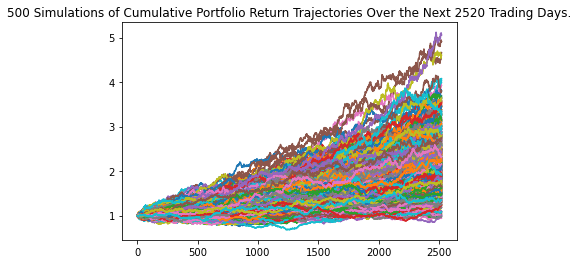

In [42]:
line_plot = MC_tenyear.plot_simulation()

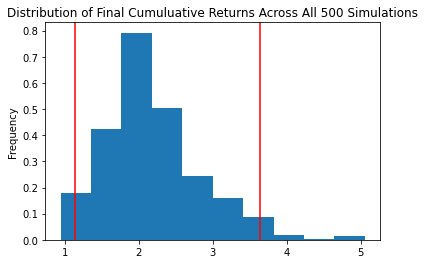

In [43]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.181351
std               0.657733
min               0.942465
25%               1.770415
50%               2.096216
75%               2.491421
max               5.058290
95% CI Lower      1.132931
95% CI Upper      3.637322
Name: 2520, dtype: float64


In [49]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $22658.63 and $72746.43
